In [1]:
%matplotlib inline

import sys
import os
sys.path.append("../..")
import my_packages.My_Geoprocess as mgp

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import Normalize
from skimage import exposure, img_as_float, morphology
from PIL import Image

from osgeo import gdal
import osr
import xml.etree.ElementTree as ET

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.cluster import KMeans
from datetime import datetime


In [2]:
npzfile = np.load('../../Poe/CompressedData/TrainMatrix.npz')
TX, ClassifIndex = npzfile['Train'], npzfile['CroppedIndex']

In [3]:
scaler = preprocessing.StandardScaler().fit(TX)
TX = np.array(scaler.transform(TX))

In [4]:
np.mean(TX, axis=0)

array([  3.52042731e-14,  -3.83726329e-13,  -3.83598818e-14,
         1.67104050e-14,  -4.85541954e-14,  -5.90919976e-13,
         2.81020576e-13,  -1.88244088e-13,  -3.96151613e-15,
         8.51140485e-14,  -6.33459546e-13])

In [5]:
TX.shape

(4196783, 11)

In [6]:
ClassifFolder = '../../Poe/Resultats/Classifications/'
ImagesFolder = '../../Poe/Images/Acolyte/S2A_MSIL1C_20180305T230901_N0206_R101_T58KEB_20180306T00234_bisAco/S2A_MSI_2018_03_05_23_09_01_T58KEB_L2R_tif/'
raster_wavelength = ['560']
raster_Name = ['rhos_' + f + '.tif' for f in raster_wavelength]

raster_dataset = gdal.Open(ImagesFolder+raster_Name[0], gdal.GA_ReadOnly)
band = raster_dataset.GetRasterBand(1)
geo_transform = raster_dataset.GetGeoTransform()
proj = raster_dataset.GetProjection()
rows, cols = (raster_dataset.RasterYSize, raster_dataset.RasterXSize)
print(rows, cols)

10980 10980


In [7]:
cluster_range = [2,3,4,5,6,7,8]
kmeans_model = []
for i, c in enumerate(cluster_range):
    ClassifName = 'Kmeans_'+str(c)+'Clusters_2.tif'
    
    kmeans_model.append(KMeans(n_clusters=c))
    kmeans_model[i].fit(TX)
    
    Im = np.full(ClassifIndex.shape, -1, np.int8)
    Im[ClassifIndex] = kmeans_model[i].predict(TX)
    Im[Im==0]=len(np.unique(Im))-1
    Im[Im==-1]=0
    
    Image = np.full((rows, cols), -1, np.int8)
    Image[5000:,0:8500] = Im
    mgp.write_raster2(ClassifFolder + ClassifName, Image, geo_transform, proj, DriverName="GTiff", formatMem=gdal.GDT_UInt16)


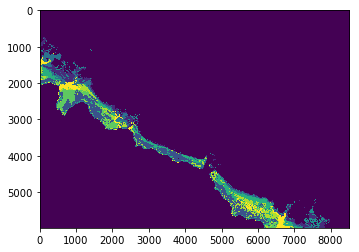

In [8]:
plt.imshow(Im)

In [9]:
np.unique(Im)

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int8)